In [1]:
%pwd

In [2]:
%cd C:/Cyclistic data

C:\Cyclistic data


In [3]:
%pwd

'C:\\Cyclistic data'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

sns.set()

In [5]:
june_2020_df = pd.read_csv("202006-divvy-tripdata.csv")
july_2020_df = pd.read_csv("202007-divvy-tripdata.csv")
august_2020_df = pd.read_csv("202008-divvy-tripdata.csv")
september_2020_df = pd.read_csv("202009-divvy-tripdata.csv")
october_2020_df = pd.read_csv("202010-divvy-tripdata.csv")
november_2020_df = pd.read_csv("202011-divvy-tripdata.csv")
december_2020_df = pd.read_csv("202012-divvy-tripdata.csv")
january_2021_df = pd.read_csv("202101-divvy-tripdata.csv")
february_2021_df = pd.read_csv("202102-divvy-tripdata.csv")
march_2021_df = pd.read_csv("202103-divvy-tripdata.csv")
april_2021_df = pd.read_csv("202104-divvy-tripdata.csv")
may_2021_df = pd.read_csv("202105-divvy-tripdata.csv")

##### Creating a list of all datafreames

In [6]:
frames = [
    june_2020_df,
    july_2020_df,
    august_2020_df,
    september_2020_df,
    october_2020_df,
    november_2020_df,
    december_2020_df,
    january_2021_df,
    february_2021_df,
    march_2021_df,
    april_2021_df,
    may_2021_df,
]

##### Verifying that the number of columns is the same across alll those datasets before concatenating

In [7]:
num_cols=[]

In [8]:
def verify_num_of_cols(frames):
    for i in frames:
        num_cols.append(len(i.columns))
    return num_cols

In [9]:
verify_num_of_cols(frames)

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]

In [10]:
data=pd.concat(frames, axis=0,ignore_index=True)
type(data)

pandas.core.frame.DataFrame

In [11]:
data.shape

(4073561, 13)

In [12]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.940180,-87.653040,41.931931,-87.677856,casual
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.872077,-87.629543,41.884241,-87.629634,member
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.884241,-87.629634,41.874053,-87.627716,member
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.945529,-87.646439,41.978353,-87.659753,casual
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.921540,-87.653818,41.940180,-87.653040,casual


##### Prepare

The data is organized month by month from June 2020 to May 2021. 
The data contains information on the type of bicycle being used, at what time did the ride start and at what time did it end, latitude, longitude of the starting and ending location. Also has the whether the user is a casual rider or an annual member,

The data integrity is not satisfied as it has missing values although it may be accurate, consistent, trustworthy. 


##### Process

###### Missing values

In [13]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_values=pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_values

,total,percent
end_station_id,229651,0.056376
end_station_name,229190,0.056263
start_station_id,202601,0.049736
start_station_name,201975,0.049582
end_lng,5037,0.001237
end_lat,5037,0.001237
member_casual,0,0.000000
start_lng,0,0.000000
start_lat,0,0.000000
ended_at,0,0.000000


##### Total missing values = 873,491

In [14]:
data[data.isna().any(axis=1)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
800,8F5DC3FE5B22E480,docked_bike,2020-06-04 07:24:22,2020-06-04 07:58:23,Broadway & Cornelia Ave,303,NaN,NaN,41.945529,-87.646439,NaN,NaN,member
1266,9358687FAE5EEC17,docked_bike,2020-06-28 13:58:51,2020-06-28 18:23:31,Michigan Ave & Lake St,52,NaN,NaN,41.886024,-87.624117,NaN,NaN,casual
2354,5399B46884E18D40,docked_bike,2020-06-21 19:08:51,2020-06-21 20:28:05,Michigan Ave & Lake St,52,NaN,NaN,41.886024,-87.624117,NaN,NaN,member
2492,EA8792DAAD74C5DA,docked_bike,2020-06-04 08:46:31,2020-06-04 10:09:18,Indiana Ave & Roosevelt Rd,255,NaN,NaN,41.867888,-87.623041,NaN,NaN,casual
2957,69D0294D7C1727E8,docked_bike,2020-06-17 09:51:33,2020-06-17 10:18:26,Clarendon Ave & Junior Ter,245,NaN,NaN,41.961004,-87.649603,NaN,NaN,member
2987,474AE1B90F57A7CF,docked_bike,2020-06-16 14:14:01,2020-06-16 14:41:51,Clarendon Ave & Junior Ter,245,NaN,NaN,41.961004,-87.649603,NaN,NaN,member
3021,EFCFE06AF3B9ACC2,docked_bike,2020-06-28 13:39:58,2020-06-28 16:08:16,Lakeview Ave & Fullerton Pkwy,313,NaN,NaN,41.925858,-87.638973,NaN,NaN,casual
3593,750A7BECB3C518E7,docked_bike,2020-06-23 16:48:04,2020-06-23 17:17:30,LaSalle St & Washington St,98,NaN,NaN,41.882664,-87.632530,NaN,NaN,member
3598,E5C02EB2151104CF,docked_bike,2020-06-26 00:27:18,2020-06-26 00:53:42,Clark St & Schiller St,301,NaN,NaN,41.907993,-87.631501,NaN,NaN,member
3855,17EB5B82784D6F5B,docked_bike,2020-06-10 10:30:17,2020-06-10 10:46:35,Wells St & Hubbard St,212,NaN,NaN,41.889906,-87.634266,NaN,NaN,casual


In [15]:
# data=data.dropna()

The columns that have misisng values, I did not need to use those for this analysis. That is why did not delete the misisng values

##### Checking for duplicate rows

In [16]:
data.duplicated().sum()

0

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073561 entries, 0 to 4073560
Data columns (total 13 columns):
ride_id               object
rideable_type         object
started_at            object
ended_at              object
start_station_name    object
start_station_id      object
end_station_name      object
end_station_id        object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual         object
dtypes: float64(4), object(9)
memory usage: 404.0+ MB


In [18]:
data['started_at']=pd.to_datetime(data['started_at'])
data['ended_at']=pd.to_datetime(data['ended_at'])

##### ride_length

In [19]:
# ride_length=data['ended_at']-data['started_at']
# ride_length=np.round(ride_length.dt.total_seconds()/60,2)
# data['ride_length']=ride_length

##### day_of_the_week

In [20]:
data['day_of_the_week']=data['started_at'].dt.dayofweek

##### Month

In [21]:
data['month'] = pd.DatetimeIndex(data['started_at']).month

In [22]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_the_week,month
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163,41.940180,-87.653040,41.931931,-87.677856,casual,5,6
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81,41.872077,-87.629543,41.884241,-87.629634,member,4,6
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5,41.884241,-87.629634,41.874053,-87.627716,member,1,6
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294,41.945529,-87.646439,41.978353,-87.659753,casual,5,6
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117,41.921540,-87.653818,41.940180,-87.653040,casual,3,6


In [23]:
data.describe()

,start_lat,start_lng,end_lat,end_lng,day_of_the_week,month
count,4.073561e+06,4.073561e+06,4.068524e+06,4.068524e+06,4.073561e+06,4.073561e+06
mean,4.190331e+01,-8.764451e+01,4.190360e+01,-8.764479e+01,3.240136e+00,7.095716e+00
std,4.404066e-02,2.598052e-02,4.412742e-02,2.611267e-02,1.997330e+00,2.600443e+00
min,4.164000e+01,-8.787000e+01,4.154000e+01,-8.807000e+01,0.000000e+00,1.000000e+00
25%,4.188213e+01,-8.765875e+01,4.188224e+01,-8.765887e+01,2.000000e+00,5.000000e+00
50%,4.189964e+01,-8.764107e+01,4.190000e+01,-8.764129e+01,3.000000e+00,7.000000e+00
75%,4.192955e+01,-8.762759e+01,4.192958e+01,-8.762769e+01,5.000000e+00,9.000000e+00
max,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01,6.000000e+00,1.200000e+01


In [24]:
data.shape

(4073561, 15)

In [25]:
data.loc[(data['started_at']>=data['ended_at'])].shape

(10787, 15)

##### There are some records that have started-at as later than eneded_at

##### saving one variable to save the ended_at as started_at and vice versa

In [26]:
started_at_greater= data.loc[(data['started_at']>=data['ended_at'])]

In [27]:
started_at_greater1= data.loc[(data['started_at']>=data['ended_at'])]

In [28]:
started_at_greater['started_at']=started_at_greater['ended_at']

C:\Users\rohan.azad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
started_at_greater1['ended_at']=started_at_greater1['started_at']

C:\Users\rohan.azad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
started_at_greater['ended_at'] =started_at_greater1['started_at']

C:\Users\rohan.azad\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
# started_at_greater.loc[(started_at_greater['started_at']==started_at_greater['ended_at'])].shape

In [32]:
started_at_greater.shape

(10787, 15)

In [33]:
started_at_greater.loc[(started_at_greater['started_at']==started_at_greater['ended_at'])].shape

(451, 15)

#### There's still some cases where the started_at_greater has same start and end time

In [34]:
started_at_greater = started_at_greater.loc[(started_at_greater['started_at'] < started_at_greater['ended_at'])]

In [35]:
started_at_greater.shape

(10336, 15)

In [36]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'day_of_the_week', 'month'],
      dtype='object')

In [37]:
started_at_greater.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'day_of_the_week', 'month'],
      dtype='object')

##### Filtering out all the rows that have same start and end time and also where the start time is greater than end time

In [38]:
data=data.loc[(data['started_at'] < data['ended_at'])]

In [39]:
data.shape

(4062774, 15)

##### The cases where the start time is greater than end time had been fixed earlier. The two sets are getting concatenated here. 

In [40]:
c=[data,started_at_greater]

In [41]:
data=pd.concat(c, axis=0,ignore_index=True)
type(data)

pandas.core.frame.DataFrame

In [42]:
data.shape

(4073110, 15)

In [43]:
data.loc[(data['started_at']==data['ended_at'])].shape

(0, 15)

In [44]:
data.loc[(data['started_at']>=data['ended_at'])].shape

(0, 15)

In [45]:
ride_length=data['ended_at']-data['started_at']
ride_length=np.round(ride_length.dt.total_seconds()/60,2)
data['ride_length']=ride_length

##### Analyze/ Visualization

In [46]:
total_riders=data['member_casual'].value_counts()
print(f"Number of riders per category \n {total_riders}")

Number of riders per category 
 member    2359944
casual    1713166
Name: member_casual, dtype: int64


##### Determining how many rides did casual riders make and how many did members make

In [47]:
casual_member_count=data.groupby(['member_casual'])['ride_id'].count()
casual_member_count

member_casual
casual    1713166
member    2359944
Name: ride_id, dtype: int64

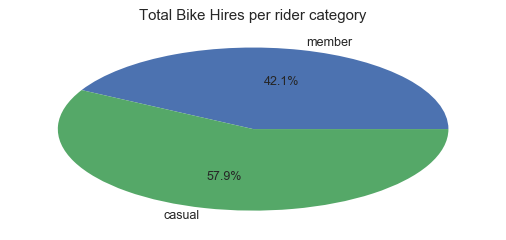

In [48]:
fig,ax=plt.subplots(figsize=(7,3),dpi=90)
labels=['member','casual']
plt.pie(x=casual_member_count,autopct="%.1f%%",labels=labels)
ax.set_title('Total Bike Hires per rider category',loc='center')
plt.show()

##### Determining how bike riders were distributed throughout the year

In [49]:
ride_hires_per_month=(
    data['month'].value_counts(sort=False).rename_axis('Month').reset_index(name="Total Hires")
)

ride_hires_per_month

,Month,Total Hires
0,1,96830
1,2,49618
2,3,228486
3,4,337197
4,5,531581
5,6,342973
6,7,551410
7,8,622250
8,9,532899
9,10,388613


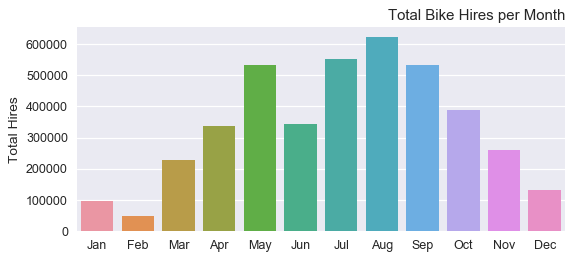

In [50]:
months=[
    'Jan',
    'Feb',
    'Mar',
    'Apr',
    'May',
    'Jun',
    'Jul',
    'Aug',
    'Sep',
    'Oct',
    'Nov',
    'Dec'
]

plt.figure(figsize=(7,3),dpi=90)
plt.title("Total Bike Hires per Month",loc='right')
sns.barplot(data=ride_hires_per_month,x=months,y='Total Hires')
plt.show()

##### Determining how bike riders were distributed throughout the days of teh week

In [51]:
ride_hires_per_day = (
    data["day_of_the_week"]
    .value_counts()
    .rename_axis("Day")
    .reset_index(name="Total Hires")
)

ride_hires_per_day

,Day,Total Hires
0,5,758905
1,6,639228
2,4,598975
3,3,534787
4,2,530961
5,1,505393
6,0,504861


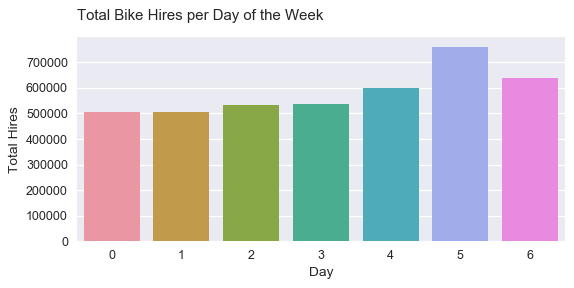

In [52]:
plt.figure(figsize=(7, 3), dpi=90)
plt.title("Total Bike Hires per Day of the Week", loc="left", pad=14)
sns.barplot(data=ride_hires_per_day, x="Day", y="Total Hires")
plt.show()

##### Figuring out how riding pattern changes every month for casual and member riders

In [53]:
monthly_casual_member_count=data.groupby(['member_casual'])['month'].value_counts()
monthly_casual_member_count

member_casual  month
casual         8        289608
               7        269271
               5        256888
               9        230669
               6        154703
               10       144994
               4        136590
               11        88090
               3         84029
               12        30077
               1         18117
               2         10130
member         8        332642
               9        302230
               7        282139
               5        274693
               10       243619
               4        200607
               6        188270
               11       171598
               3        144457
               12       101488
               1         78713
               2         39488
Name: month, dtype: int64

In [54]:
monthly_casual_member_df=pd.DataFrame()
monthly_casual_member_df['casual']=monthly_casual_member_count['casual']
monthly_casual_member_df['member']=monthly_casual_member_count['member']
monthly_casual_member_df['month']=monthly_casual_member_df.index # why does putting an index here work?
monthly_casual_member_df

,casual,member,month
month,,,
8,289608,332642,8
7,269271,282139,7
5,256888,274693,5
9,230669,302230,9
6,154703,188270,6
10,144994,243619,10
4,136590,200607,4
11,88090,171598,11
3,84029,144457,3


In [55]:
pos = list(range(1,len(monthly_casual_member_df["casual"])+1))
width = 0.25

<BarContainer object of 12 artists>

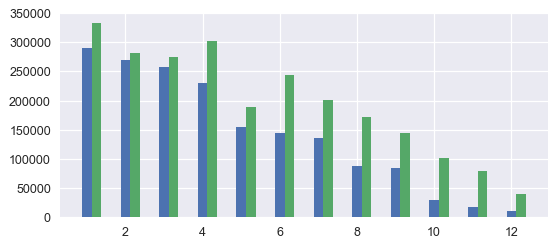

In [56]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

plt.bar(pos, monthly_casual_member_df["casual"], width)
plt.bar([p + width for p in pos], monthly_casual_member_df["member"], width)

In [57]:
# Setting the y and x axis label
ax.set_ylabel("Total Hires")
ax.set_xlabel("Month")
# Setting the chart's title
ax.set_title("Total Bike Hires per Rider Category per Month", loc="left", pad=14)


Text(0,1,'Total Bike Hires per Rider Category per Month')

In [58]:
day_week_casual_member_df=data.groupby(['member_casual'])['day_of_the_week'].value_counts(sort=True)
day_week_casual_member_df

member_casual  day_of_the_week
casual         5                  397226
               6                  330501
               4                  247182
               3                  191996
               0                  188663
               2                  182820
               1                  174778
member         5                  361679
               4                  351793
               2                  348141
               3                  342791
               1                  330615
               0                  316198
               6                  308727
Name: day_of_the_week, dtype: int64

In [59]:
casual_member_df=pd.DataFrame()
casual_member_df['casual']=day_week_casual_member_df['casual']
casual_member_df['member']=day_week_casual_member_df['member']
casual_member_df["Day"]=casual_member_df.index

In [60]:
casual_member_df.head()

,casual,member,Day
day_of_the_week,,,
5,397226,361679,5
6,330501,308727,6
4,247182,351793,4
3,191996,342791,3
0,188663,316198,0


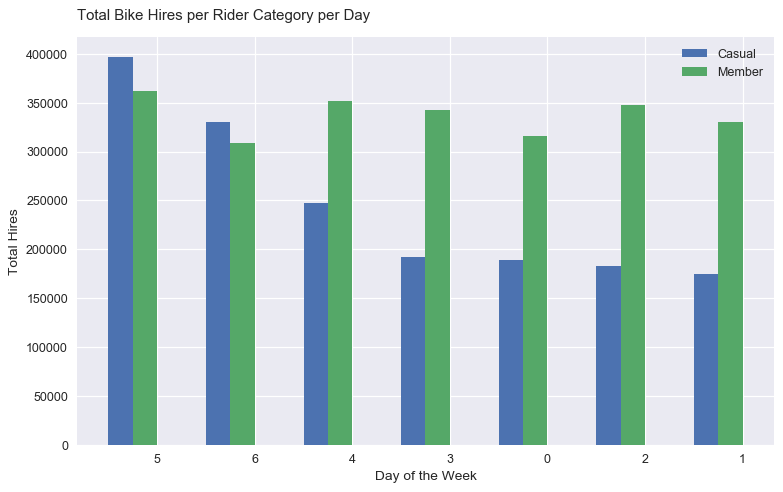

In [61]:
pos = list(range(len(casual_member_df["casual"])))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6), dpi=90)

plt.bar(pos, casual_member_df["casual"], width)
plt.bar([p + width for p in pos], casual_member_df["member"], width)

# Setting the y and x axis label
ax.set_ylabel("Total Hires")
ax.set_xlabel("Day of the Week")
# Setting the chart's title
ax.set_title("Total Bike Hires per Rider Category per Day", loc="left", pad=14)

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(casual_member_df["Day"])

# Adding the legend and showing the plot
plt.legend(["Casual", "Member"], loc="upper right")
plt.show()

##### Getting the average ride length by category

In [62]:
average_ride_length=data.groupby(['member_casual'])['ride_length'].mean()
print('Average ride length per category {}'.format(average_ride_length))

Average ride length per category member_casual
casual    43.940457
member    19.086991
Name: ride_length, dtype: float64


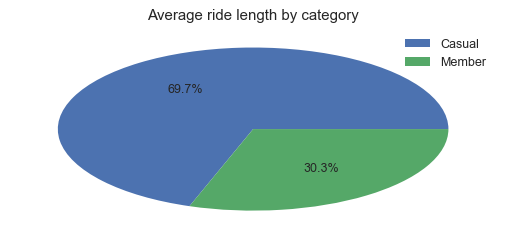

In [63]:
fig,ax=plt.subplots(figsize=(7,3),dpi=90)
plt.pie(x=average_ride_length, autopct='%.1f%%')
ax.set_title('Average ride length by category')
plt.legend(["Casual", "Member"])
plt.show()

##### Getting the average ride length by day per category

In [64]:
average_daily_ride_length=data.groupby(['member_casual','day_of_the_week'])['ride_length'].mean()
print('Average ride length per day \n {}'.format(average_daily_ride_length))

Average ride length per day 
 member_casual  day_of_the_week
casual         0                  42.161747
               1                  50.832234
               2                  38.258793
               3                  39.859044
               4                  40.419240
               5                  44.478304
               6                  48.812207
member         0                  14.899146
               1                  40.383738
               2                  14.774089
               3                  14.580223
               4                  15.166332
               5                  16.941276
               6                  17.418407
Name: ride_length, dtype: float64


In [65]:
weekly_average_ride_length_df = pd.DataFrame()

weekly_average_ride_length_df["casual"] = average_daily_ride_length["casual"]
weekly_average_ride_length_df["member"] = average_daily_ride_length["member"]
weekly_average_ride_length_df["Day"] = weekly_average_ride_length_df.index
weekly_average_ride_length_df.head()

,casual,member,Day
day_of_the_week,,,
0,42.161747,14.899146,0
1,50.832234,40.383738,1
2,38.258793,14.774089,2
3,39.859044,14.580223,3
4,40.419240,15.166332,4


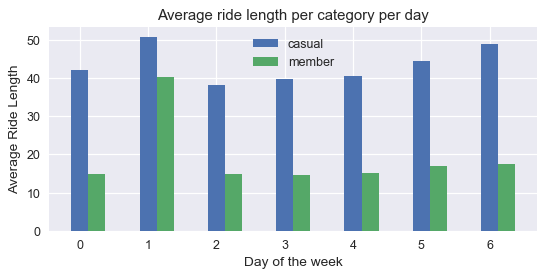

In [69]:
pos=list(range(len(weekly_average_ride_length_df['casual'])))
width=0.25

fig,ax=plt.subplots(figsize=(7,3),dpi=90)
plt.bar(pos,weekly_average_ride_length_df['casual'],width)
plt.bar([p+width for p in pos], weekly_average_ride_length_df['member'],width)

ax.set_ylabel('Average Ride Length')
ax.set_xlabel('Day of the week')
ax.set_title('Average ride length per category per day')

plt.legend(['casual','member'])
plt.show()

##### Getting the average ride length by month per category

In [71]:
average_monthly_ride_length=data.groupby(['member_casual','month'])['ride_length'].mean()
print('Average ride length per category per month \n {}'.format(average_monthly_ride_length))

Average ride length per category per month 
 member_casual  month
casual         1         25.684578
               2         49.378106
               3         38.160543
               4         38.026049
               5         38.235135
               6         51.615852
               7         59.821422
               8         44.782011
               9         38.121178
               10        30.164486
               11        31.764290
               12       101.784184
member         1         12.872690
               2         18.023456
               3         13.970542
               4         14.690460
               5         14.640188
               6         18.703395
               7         17.701396
               8         16.749187
               9         15.465737
               10        13.991344
               11        13.540896
               12        96.949201
Name: ride_length, dtype: float64


In [73]:
average_monthly_ride_length_df=pd.DataFrame()
average_monthly_ride_length_df['casual']=average_monthly_ride_length['casual']
average_monthly_ride_length_df['member']= average_monthly_ride_length['member']
average_monthly_ride_length_df['month']=average_monthly_ride_length_df.index
average_monthly_ride_length_df

,casual,member,month
month,,,
1,25.684578,12.872690,1
2,49.378106,18.023456,2
3,38.160543,13.970542,3
4,38.026049,14.690460,4
5,38.235135,14.640188,5
6,51.615852,18.703395,6
7,59.821422,17.701396,7
8,44.782011,16.749187,8
9,38.121178,15.465737,9


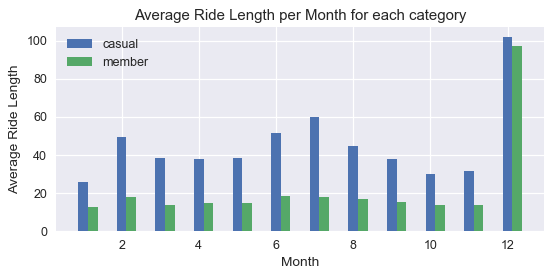

In [77]:
pos=list(range(1, len(average_monthly_ride_length_df['casual'])+1))
width=0.25

fig,ax=plt.subplots(figsize=(7,3),dpi=90)
plt.bar(pos,average_monthly_ride_length_df['casual'],width)
plt.bar([p+width for p in pos],average_monthly_ride_length_df['member'],width)

ax.set_ylabel('Average Ride Length')
ax.set_xlabel('Month')
ax.set_title('Average Ride Length per Month for each category')

plt.legend(['casual','member'])
plt.show()

###### Rideable type for each category

In [80]:
bike_type=data.groupby(['member_casual'])['rideable_type'].value_counts().reset_index(name='Total Hires')
bike_type

,member_casual,rideable_type,Total Hires
0,casual,docked_bike,1074014
1,casual,electric_bike,373639
2,casual,classic_bike,265513
3,member,docked_bike,1267195
4,member,classic_bike,578023
5,member,electric_bike,514726
